In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df1 = pd.read_csv(r"/content/tested.csv")

In [ ]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df1.shape

(418, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df1.drop(columns='Cabin',inplace=True)

In [ ]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [ ]:
# Data Visualization and Analysis
# let's see how many passangers survived.

survived = df1['Survived'].value_counts()
survived

Survived
0    266
1    152
Name: count, dtype: int64

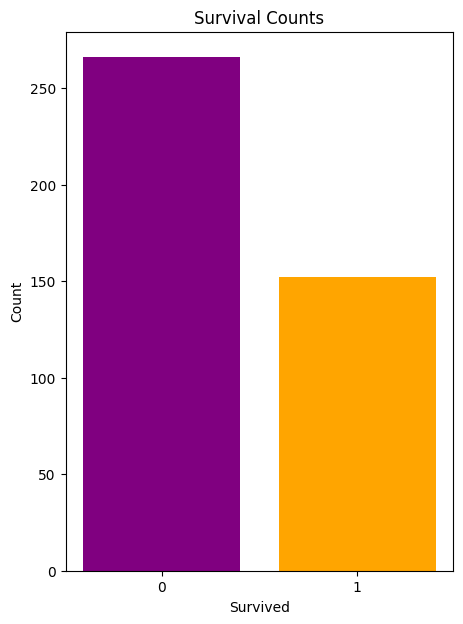

In [ ]:
plt.figure(figsize=(5,7))
# Use the index and values of the Series directly for plotting
plt.bar(survived.index, survived.values, color=['purple','orange'])
plt.xticks(survived.index)
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [ ]:
# Above bar chart shows the number of survived and non-survived passangers.

# And 0 and 1 indicates number of non-survived and number of survived passangers respectively.

In [ ]:
survived_mf = df1.groupby('Sex')['Survived'].value_counts().reset_index(name='count')
survived_mf

,Sex,Survived,count
0,female,1,152
1,male,0,266


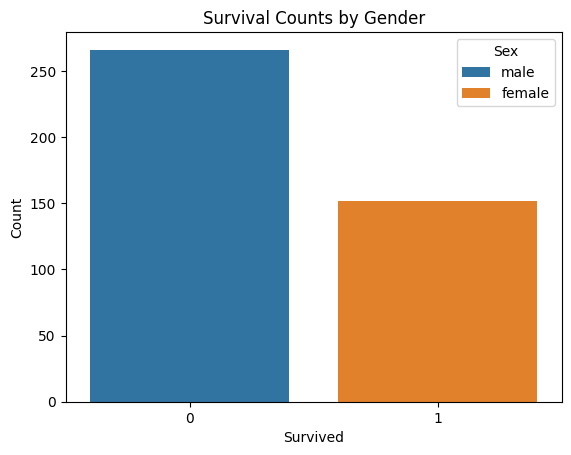

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df1)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

In [ ]:
pclass = df1['Pclass'].value_counts()
pclass

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

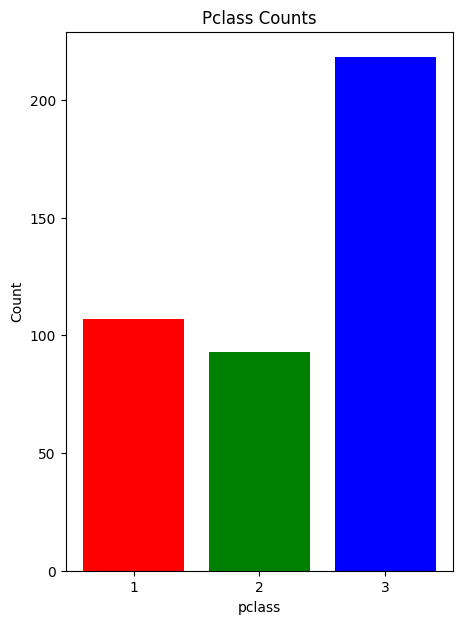

In [ ]:
plt.figure(figsize=(5,7))
plt.bar(pclass.index, pclass.values, color=['blue','red','green'])
plt.xticks(pclass.index)
plt.title('Pclass Counts')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.show()

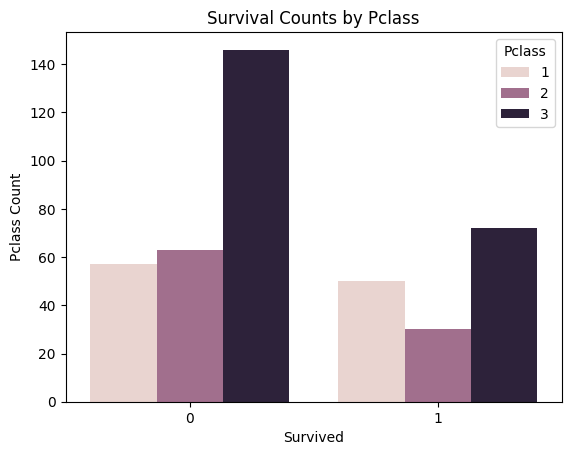

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df1)
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass Count')
plt.show()

In [ ]:

# Here the first graph shows the number of passangers in each class and second graph shows the number of passanger survived in each class.

In [ ]:
# Distribution of dataset

In [ ]:
import plotly.express as px
from plotly.offline import iplot, plot
histogram_labels = ['Fare',
                    'Age'
                   ]
colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df1,
                       histogram_labels[i],
                       title=f'{histogram_labels[i]} distribution',
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

In [ ]:
# Split the data into train and test
df1.drop(columns=['PassengerId','Name','Ticket'],inplace=True)
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df1['Sex'] = label_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = label_encoder.fit_transform(df1['Embarked'])
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [ ]:
X = df1.drop(columns='Survived',axis=1)
Y = df1['Survived']
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [ ]:
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=78)
print(X_train)
print(x_test)
print(Y_train)
print(y_test)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
70        3    0  24.00000      0      0    7.7500         1
242       1    1  45.00000      1      1  134.5000         0
9         3    1  21.00000      2      0   24.1500         2
91        3    1  30.27259      0      0    7.7750         2
46        1    1  45.00000      0      0   29.7000         0
..      ...  ...       ...    ...    ...       ...       ...
310       3    1  18.00000      0      0    8.6625         2
105       3    1  28.00000      0      0   22.5250         2
40        3    1  39.00000      0      1   13.4167         0
407       1    1  50.00000      1      1  211.5000         0
197       3    0  18.00000      0      0    7.7750         2

[334 rows x 7 columns]
     Pclass  Sex       Age  SibSp  Parch     Fare  Embarked
221       3    1  21.00000      0      0   8.0500         2
402       1    0  22.00000      0      1  59.4000         0
181       1    1  37.00000      1      1  83.1583         0
225 

In [ ]:
# Correlation between columns
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,-1.000000,-0.000011,0.099943,0.159120,0.191514,-0.076281
Pclass,-0.108615,1.000000,0.108615,-0.440782,0.001087,0.018721,-0.577147,0.227983
Sex,-1.000000,0.108615,1.000000,0.000011,-0.099943,-0.159120,-0.191514,0.076281
Age,-0.000011,-0.440782,0.000011,1.000000,-0.079535,-0.045073,0.329071,-0.157996
SibSp,0.099943,0.001087,-0.099943,-0.079535,1.000000,0.306895,0.171539,0.052708
Parch,0.159120,0.018721,-0.159120,-0.045073,0.306895,1.000000,0.230046,0.054577
Fare,0.191514,-0.577147,-0.191514,0.329071,0.171539,0.230046,1.000000,-0.257183
Embarked,-0.076281,0.227983,0.076281,-0.157996,0.052708,0.054577,-0.257183,1.000000


<Axes: >

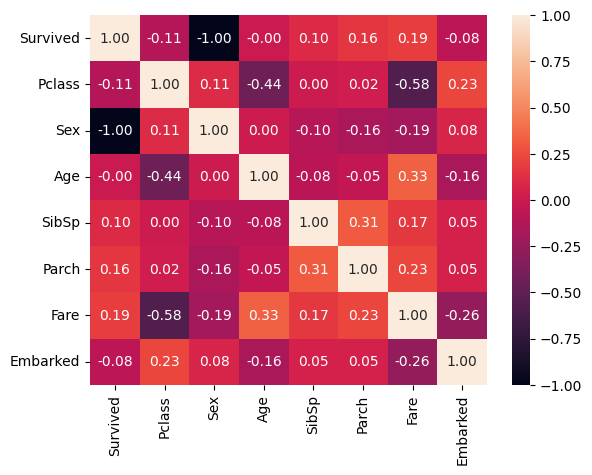

In [ ]:
sns.heatmap(df1.corr(), annot=True, fmt=".2f")

In [ ]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [ ]:
X_train =X_train.fillna(X_train.mean())
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
ypred = log.predict(x_test)
ypred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
y_test.values

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [ ]:
log.score(x_test, y_test)

1.0

In [ ]:
log.score(X_train, Y_train)

1.0

In [ ]:
# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test,ypred)

array([[48,  0],
       [ 0, 36]])

<Axes: >

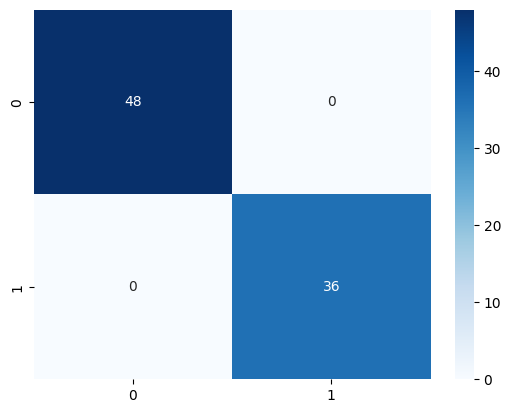

In [ ]:
sns.heatmap(confusion_matrix(y_test,ypred),annot=True,fmt='d',cmap='Blues')

In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        36

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
# Here after evaluating this model we got 100% accuracy.